1.0000000000000009


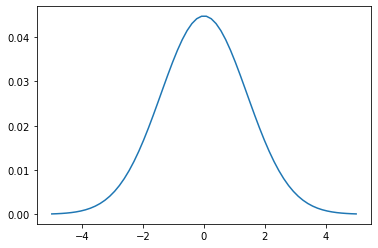

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#Preparing the Gaussian-shaped histogram that will be used in the initialisation
x = np.linspace(-5,5, num=64)
a = []
i=0
totsum = 0
dx = (x[1] - x[0])
hist = []
normalisedthing = 1.4137522208747721
histnorm = []

for i in range(len(x)):
    y = (1/math.sqrt(2*math.pi)*math.exp(-(0.5*x[i]**2)/2))

    hist.append(y*dx/normalisedthing)
    
    histnorm.append(math.sqrt(hist[i])) 
    
    totsum = totsum + hist[i]

print(totsum)
plt.plot(x,hist)
plt.show()


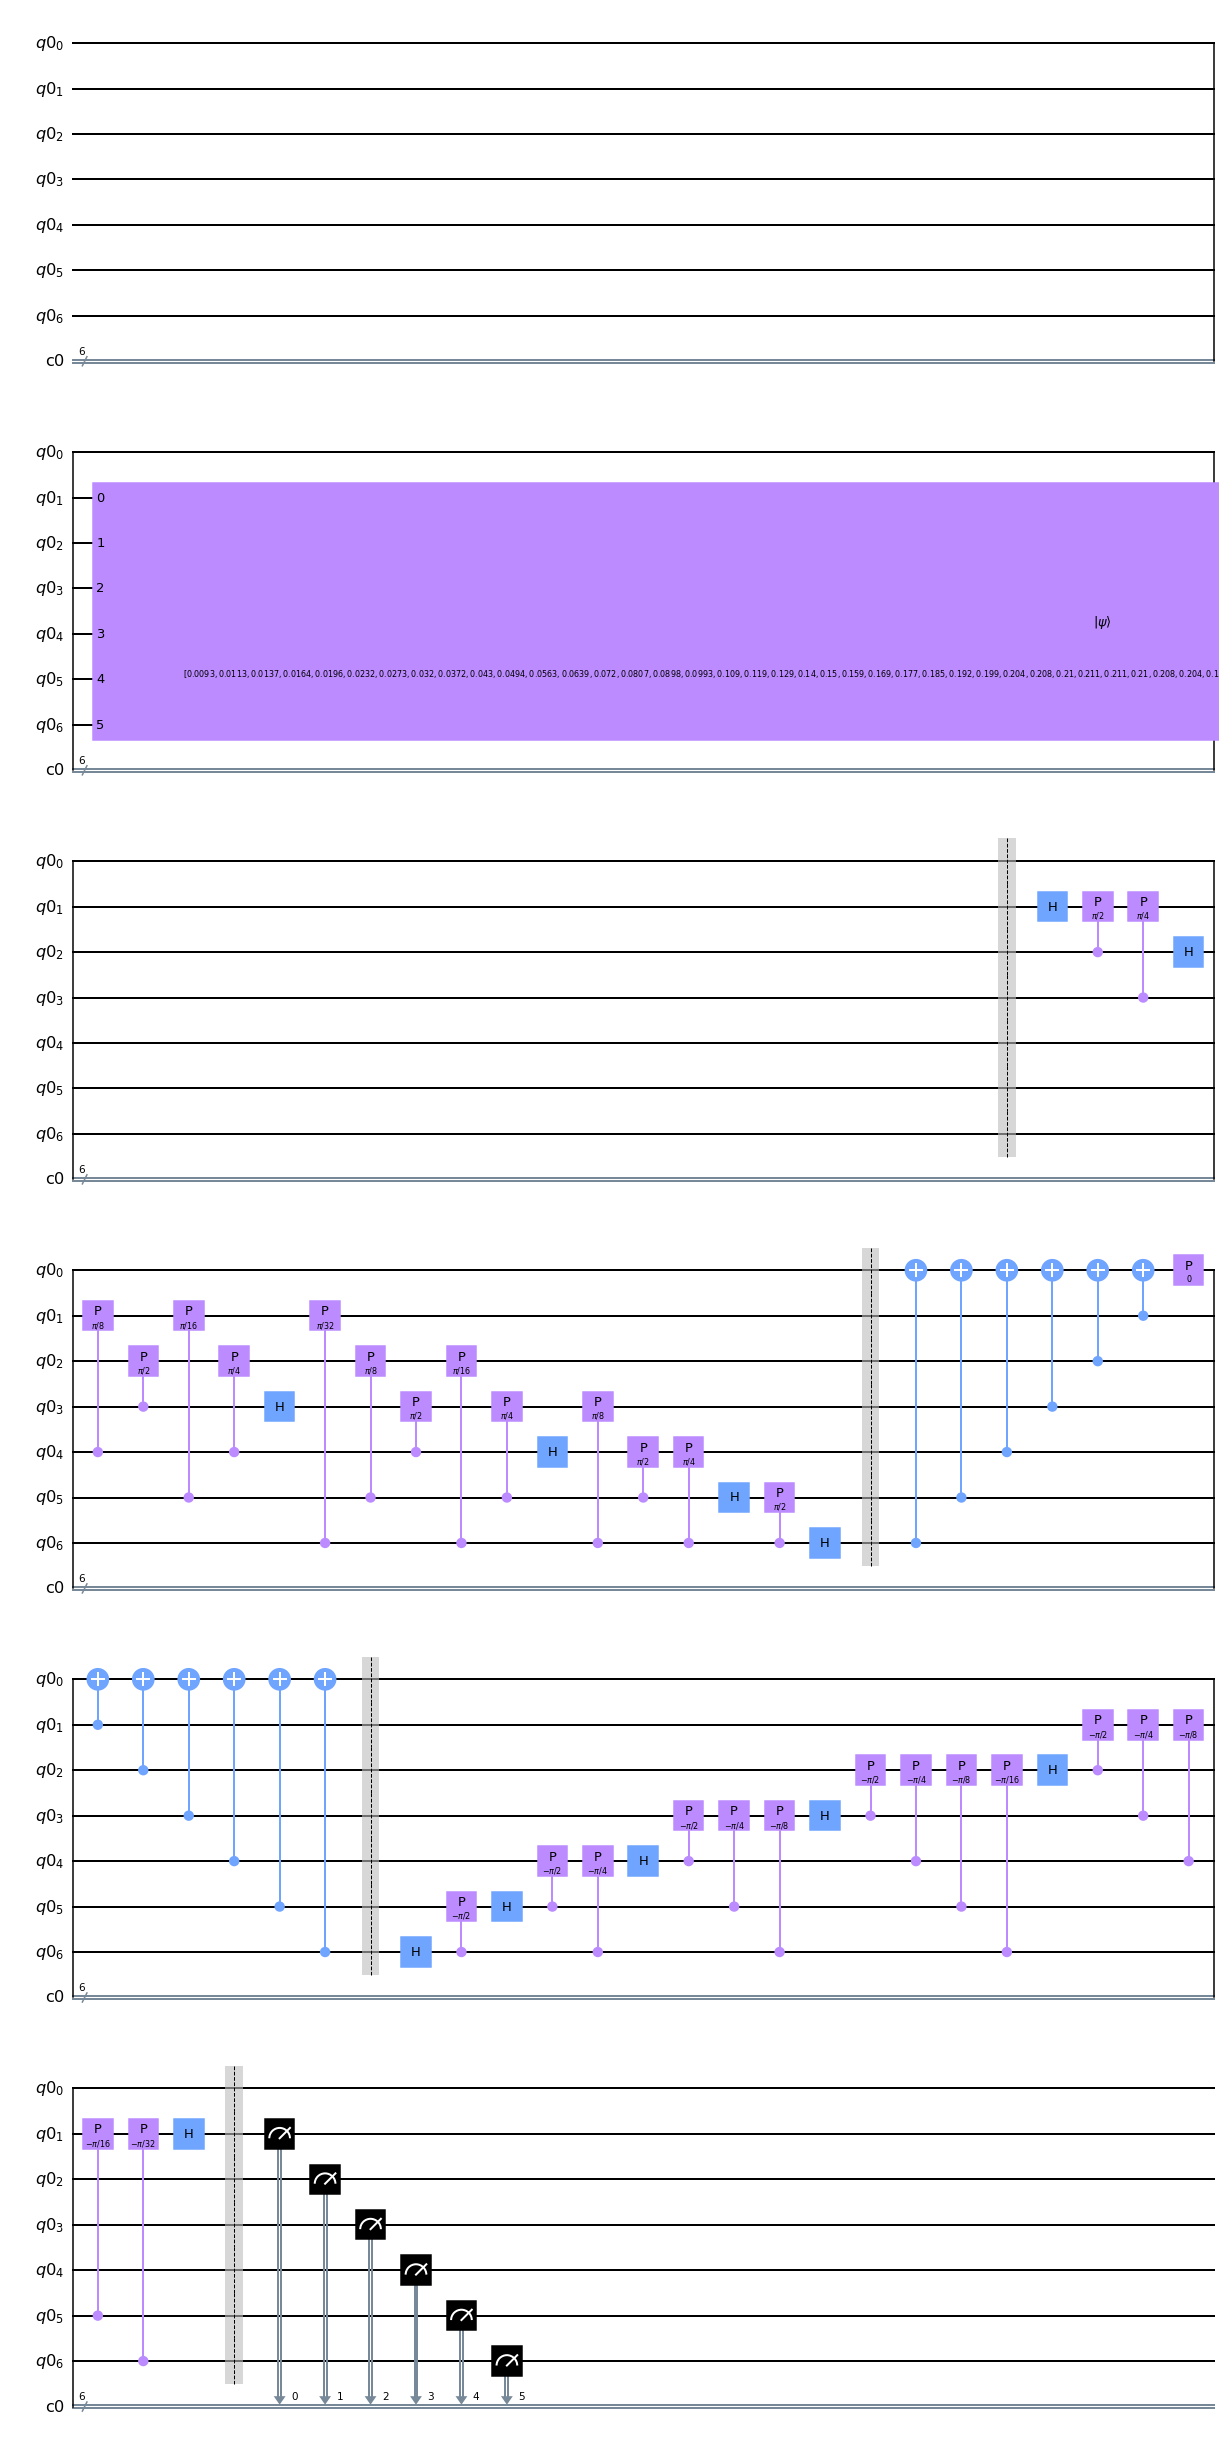

In [3]:


#n = 6 #number of qubits not including ancilla
phi = 0


q = QuantumRegister(7)
c = ClassicalRegister(6)
qc = QuantumCircuit(q,c)

qc2 = QuantumCircuit(q,c)

#Initialisation


#################################################################################################################


qc.initialize(histnorm, [q[1],q[2],q[3],q[4],q[5],q[6]])


qc2.initialize(histnorm, [q[1],q[2],q[3],q[4],q[5],q[6]])



#######################################################################################################################



#qc.initialize(amplitude, [q[1],q[2],q[3],q[4],q[5],q[6]])
#qc2.initialize(amplitude, [q[1],q[2],q[3],q[4],q[5],q[6]])

#Attempt at Gaussian Curve

#gauss = =1/(math.sqrt(2*(15)))*math.exp(-0.5*x^2)




qc.barrier()

#QFT

qc.h(1); qc.cp(pi/2,2,1); qc.cp(pi/4,3,1); qc.cp(pi/8,4,1); qc.cp(pi/16,5,1); qc.cp(pi/32,6,1)
qc.h(2); qc.cp(pi/2,3,2); qc.cp(pi/4,4,2); qc.cp(pi/8,5,2); qc.cp(pi/16,6,2)
qc.h(3); qc.cp(pi/2,4,3); qc.cp(pi/4,5,3); qc.cp(pi/8,6,3)
qc.h(4); qc.cp(pi/2,5,4); qc.cp(pi/4,6,4)
qc.h(5); qc.cp(pi/2,6,5);
qc.h(6)

#qc.swap(3,4)
#qc.swap(2,5)
#qc.swap(1,6)


qc.barrier()



#Time Step
qc.cx(6,0); qc.cx(5,0); qc.cx(4,0); qc.cx(3,0); qc.cx(2,0); qc.cx(1,0)
qc.p(phi,0)
qc.cx(1,0); qc.cx(2,0); qc.cx(3,0); qc.cx(4,0); qc.cx(5,0); qc.cx(6,0)

qc.barrier()




#Inverse QFT

qc.h(6)
qc.cp(-pi/2,6,5); qc.h(5)
qc.cp(-pi/2,5,4); qc.cp(-pi/4,6,4); qc.h(4)
qc.cp(-pi/2,4,3); qc.cp(-pi/4,5,3); qc.cp(-pi/8,6,3); qc.h(3)
qc.cp(-pi/2,3,2); qc.cp(-pi/4,4,2); qc.cp(-pi/8,5,2); qc.cp(-pi/16,6,2); qc.h(2)
qc.cp(-pi/2,2,1); qc.cp(-pi/4,3,1); qc.cp(-pi/8,4,1); qc.cp(-pi/16,5,1); qc.cp(-pi/32,6,1); qc.h(1)

#qc.swap(3,4)
#qc.swap(2,5)
#qc.swap(1,6)


qc.barrier()


#Measurement

for k in range(6):
    qc.measure(k+1,k)
    qc2.measure(k+1,k)




qc.draw('mpl')


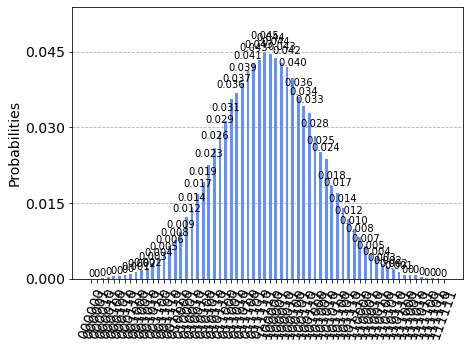

In [4]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)